In [200]:
all_aod = xarray.open_mfdataset(aod_vis_all_concatenated(), combine='nested', concat_dim="member")["AODVIS"].groupby("time.year").mean().load()

In [211]:
for m_i in all_aod.member[:5]:
    print(m_i)
    for year in all_aod.year:
        all_aod.sel(member=m_i).sel(year=year).to_netcdf(f"~/scratch/test_m{m_i.values}_{year.values}.nc")

<xarray.DataArray 'member' ()>
array(0)
<xarray.DataArray 'member' ()>
array(1)
<xarray.DataArray 'member' ()>
array(2)
<xarray.DataArray 'member' ()>
array(3)
<xarray.DataArray 'member' ()>
array(4)


In [210]:
str(all_aod.year[0].values)

'1920'

In [17]:
from paths import aod_vis_xaer_download, DIR_PATH, aod_vis_xaer_concatenated, aod_vis_all_concatenated

# hist, future = aod_vis_xaer_download()
# hist.sort()
# future.sort()

# for index, hist_path in enumerate(hist):
#     print(index, end=", ")
#     export_path = f"{DIR_PATH}AODVIS/XAER/concatenated/xaer_aodvis_{index}.nc"
#     xarray.open_mfdataset([hist_path, future[index]], combine='nested', concat_dim="time")["AODVIS"].groupby("time.year").mean().to_netcdf(export_path)

In [ ]:
from paths import aod_vis_xaer_download, DIR_PATH, aod_vis_xaer_concatenated, aod_vis_all_concatenated
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors
from matplotlib import rc

all_aod = xarray.open_mfdataset(aod_vis_all_concatenated(), combine='nested', concat_dim="member")["AODVIS"].groupby("time.year").mean().load()
xaer_aod = xarray.open_mfdataset(aod_vis_xaer_concatenated(), combine='nested', concat_dim="member")["AODVIS"].load()
aod_ds = all_aod - xaer_aod

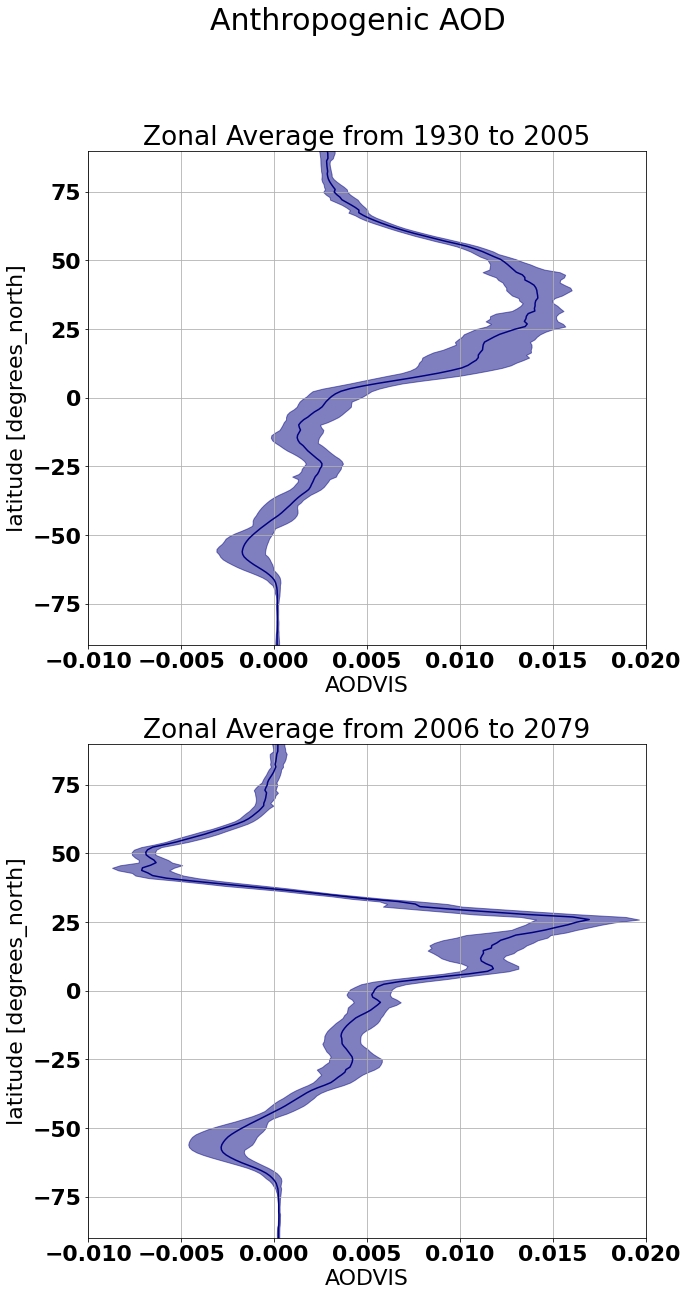

In [154]:
rc('font', **{'family': 'normal', 'weight': 'bold', 'size': 22})
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 20), facecolor='w')
f.suptitle(f"Anthropogenic AOD", fontsize=30)
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'

color="navy"

aod_data = aod_ds.sel(year=slice(1930,2005)).mean(dim="lon").mean(dim="year")
aod_data.mean(dim="member").plot(ax=ax1, y="lat", color=color)
ax1.fill_betweenx(aod_data.lat, aod_data.min(dim="member"), aod_data.max(dim="member"), color=color, alpha=0.5)
ax1.set_title("Zonal Average from 1930 to 2005")
aod_data = aod_ds.sel(year=slice(2006,2079)).mean(dim="lon").mean(dim="year")
aod_data.mean(dim="member").plot(ax=ax2, y="lat", color=color)
ax2.fill_betweenx(aod_data.lat, aod_data.min(dim="member"), aod_data.max(dim="member"), color=color, alpha=0.5)
ax2.set_title("Zonal Average from 2006 to 2079")

ax1.set_ylim(-90, 90)
ax2.set_ylim(-90, 90)

ax1.set_xlim(-0.01, 0.02)
ax2.set_xlim(-0.01, 0.02)

ax1.grid()
ax2.grid()

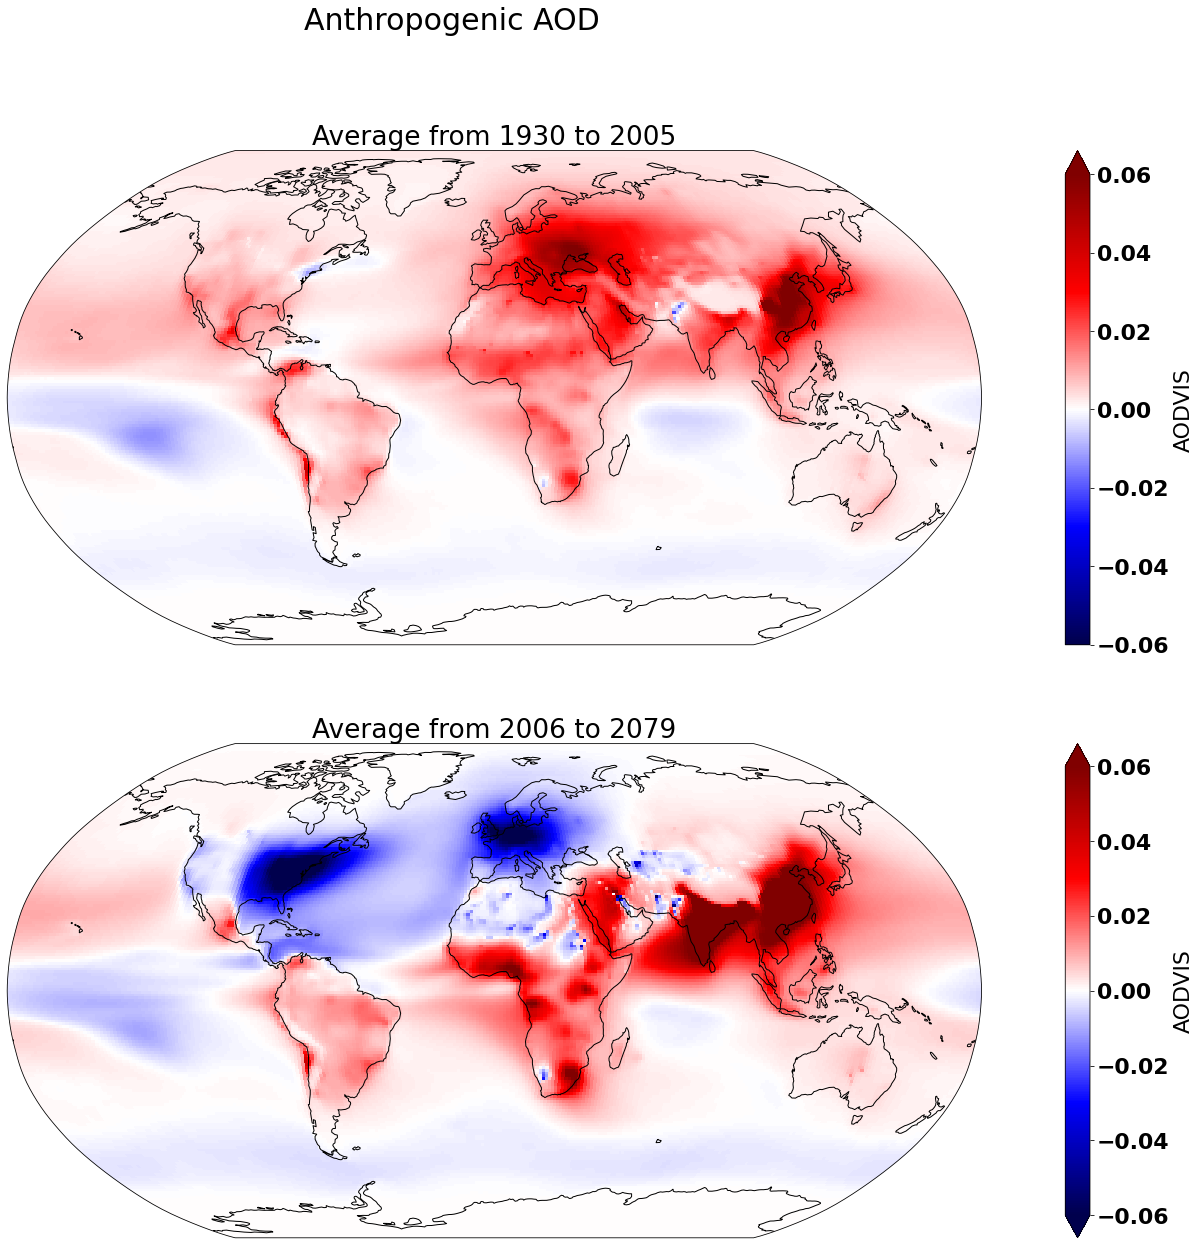

In [145]:
rc('font', **{'family': 'normal', 'weight': 'bold', 'size': 22})
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 20), facecolor='w', subplot_kw={'projection': ccrs.Robinson()})
f.suptitle(f"Anthropogenic AOD", fontsize=30)

aod_ds.sel(year=slice(1930,2005)).mean(dim="member").mean(dim="year").plot(ax=ax1, transform=ccrs.PlateCarree(), cmap="seismic", vmin=-0.06, vmax=0.06)
ax1.set_title("Average from 1930 to 2005")
aod_ds.sel(year=slice(2006,2079)).mean(dim="member").mean(dim="year").plot(ax=ax2, transform=ccrs.PlateCarree(), cmap="seismic", vmin=-0.06, vmax=0.06)
ax2.set_title("Average from 2006 to 2079")

ax1.coastlines()
ax2.coastlines()

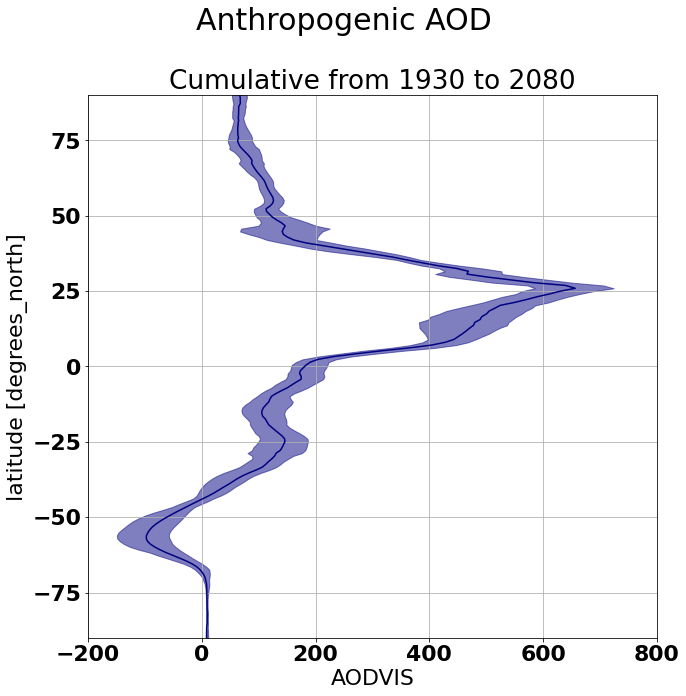

In [135]:
rc('font', **{'family': 'normal', 'weight': 'bold', 'size': 22})
f, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor='w')
f.suptitle(f"Anthropogenic AOD", fontsize=30)

aod_data = aod_ds.sel(year=slice(1930,2079)).sum(dim="lon").sum(dim="year")
aod_data.mean(dim="member").plot(ax=ax, y="lat", color="navy")
ax.fill_betweenx(aod_data.lat, aod_data.min(dim="member"), aod_data.max(dim="member"), color="navy", alpha=0.5)

ax.set_title("Cumulative from 1930 to 2080")
ax.set_ylim(-90, 90)
ax.grid()
f.tight_layout()

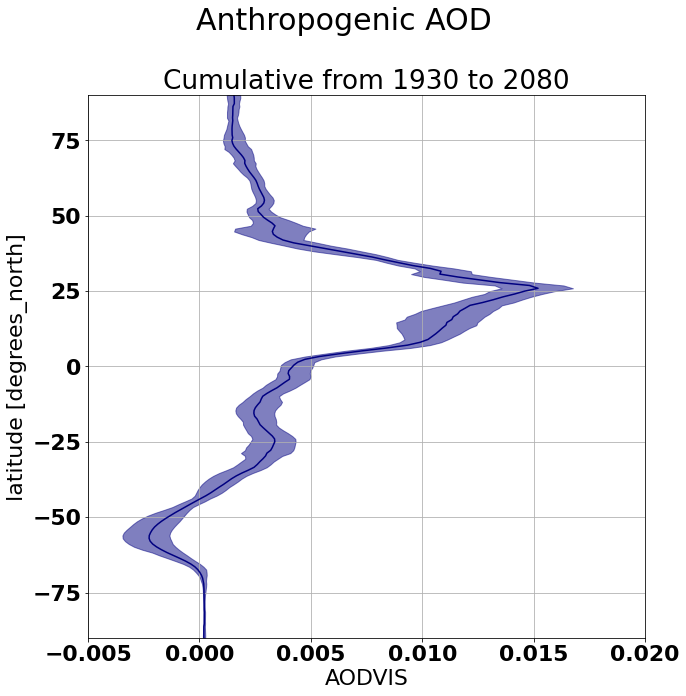

In [136]:
rc('font', **{'family': 'normal', 'weight': 'bold', 'size': 22})
f, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor='w')
f.suptitle(f"Anthropogenic AOD", fontsize=30)

aod_data = aod_ds.sel(year=slice(1930,2079)).mean(dim="lon").mean(dim="year")
aod_data.mean(dim="member").plot(ax=ax, y="lat", color="navy")
ax.fill_betweenx(aod_data.lat, aod_data.min(dim="member"), aod_data.max(dim="member"), color="navy", alpha=0.5)

ax.set_title("Cumulative from 1930 to 2080")
ax.set_ylim(-90, 90)
ax.grid()
f.tight_layout()

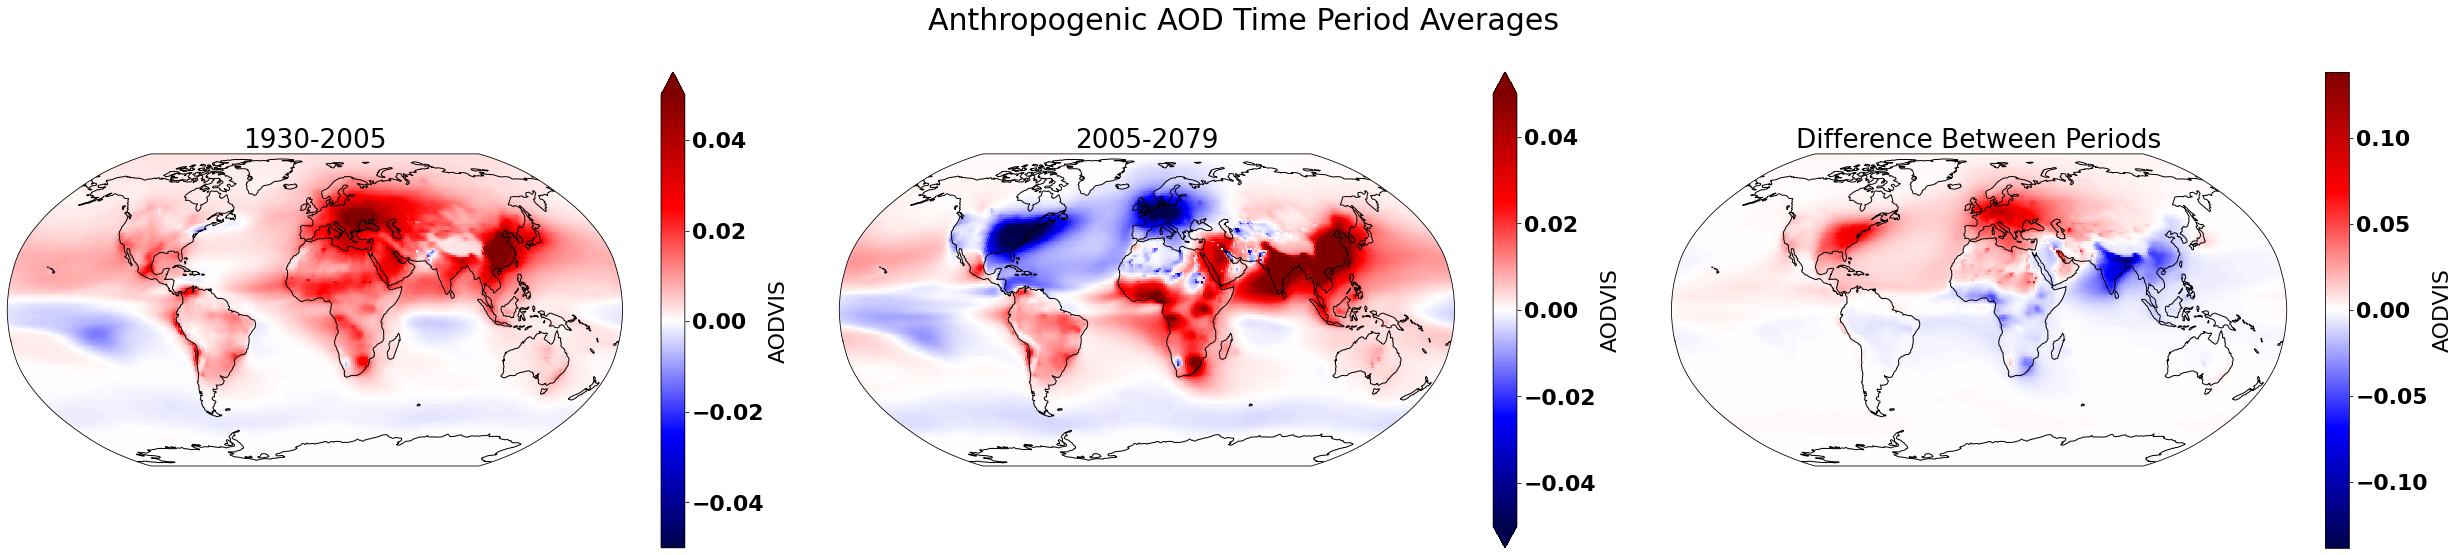

In [194]:
rc('font', **{'family': 'normal', 'weight': 'bold', 'size': 22})
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(35, 8), facecolor='w', subplot_kw={'projection': ccrs.Robinson()})
f.suptitle(f"Anthropogenic AOD Time Period Averages", fontsize=30)

vmin = -0.05
vmax = 0.05
cmap="seismic"

aod_ds.sel(year=slice(1930, 2005)).mean(dim="member").mean(dim="year").plot(ax=ax1, vmax=vmax, vmin=vmin, transform=ccrs.PlateCarree(), cmap=cmap)
aod_ds.sel(year=slice(2005, 2079)).mean(dim="member").mean(dim="year").plot(ax=ax2, vmax=vmax, vmin=vmin, transform=ccrs.PlateCarree(), cmap=cmap)

diff = aod_ds.sel(year=slice(1930, 2005)).mean(dim="member").mean(dim="year") - aod_ds.sel(year=slice(2005, 2079)).mean(dim="member").mean(dim="year")
diff.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap="seismic")


ax1.set_title("1930-2005")
ax2.set_title("2005-2079")
ax3.set_title("Difference Between Periods")

ax1.coastlines()
ax2.coastlines()
ax3.coastlines()

f.tight_layout()

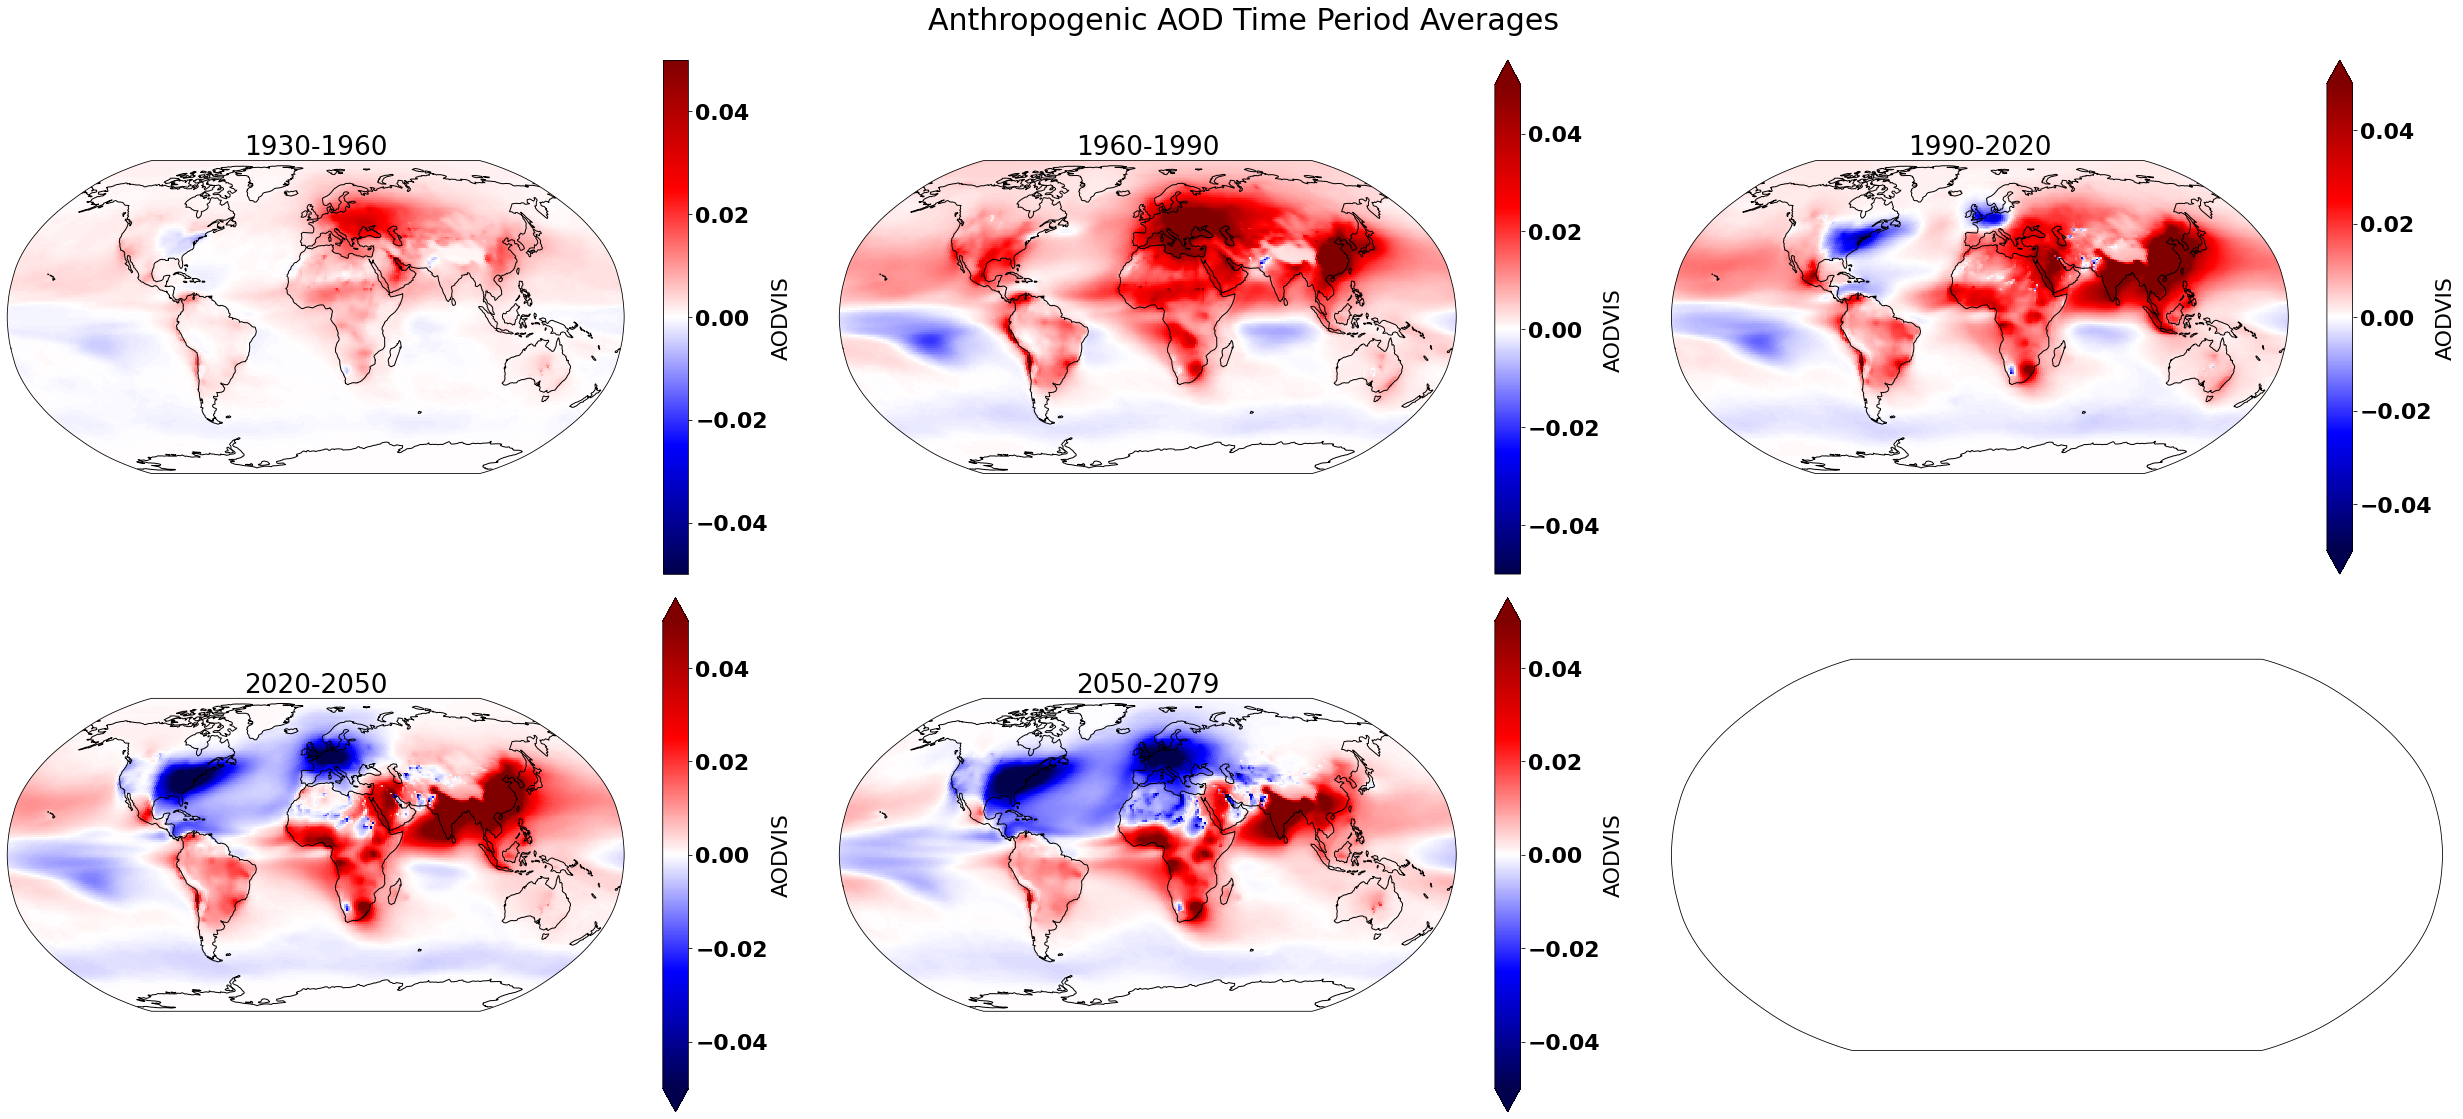

In [196]:
rc('font', **{'family': 'normal', 'weight': 'bold', 'size': 22})
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(35, 16), facecolor='w', subplot_kw={'projection': ccrs.Robinson()})
f.suptitle(f"Anthropogenic AOD Time Period Averages", fontsize=30)

vmin = -0.05
vmax = 0.05
cmap="seismic"

aod_ds.sel(year=slice(1930, 1960)).mean(dim="member").mean(dim="year").plot(ax=ax1, vmax=vmax, vmin=vmin, transform=ccrs.PlateCarree(), cmap=cmap)
aod_ds.sel(year=slice(1960, 1990)).mean(dim="member").mean(dim="year").plot(ax=ax2, vmax=vmax, vmin=vmin, transform=ccrs.PlateCarree(), cmap=cmap)
aod_ds.sel(year=slice(1990, 2020)).mean(dim="member").mean(dim="year").plot(ax=ax3, vmax=vmax, vmin=vmin, transform=ccrs.PlateCarree(), cmap=cmap)
aod_ds.sel(year=slice(2020, 2050)).mean(dim="member").mean(dim="year").plot(ax=ax4, vmax=vmax, vmin=vmin, transform=ccrs.PlateCarree(), cmap=cmap)
aod_ds.sel(year=slice(2050, 2079)).mean(dim="member").mean(dim="year").plot(ax=ax5, vmax=vmax, vmin=vmin, transform=ccrs.PlateCarree(), cmap=cmap)

ax1.set_title("1930-1960")
ax2.set_title("1960-1990")
ax3.set_title("1990-2020")
ax4.set_title("2020-2050")
ax5.set_title("2050-2079")

ax1.coastlines()
ax2.coastlines()
ax3.coastlines()
ax4.coastlines()
ax5.coastlines()

f.tight_layout()

In [1]:
import xarray
from paths import heat_out_trefht_tmax_members_1920_1950_CONTROL as hwmax, DIR_PATH
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rc

all_aod = xarray.open_mfdataset(aod_vis_all_concatenated(), combine='nested', concat_dim="member")["AODVIS"].groupby("time.year").mean().load()
xaer_aod = xarray.open_mfdataset(aod_vis_xaer_concatenated(), combine='nested', concat_dim="member")["AODVIS"].load()
aod_ds = all_aod - xaer_aod

land_mask = xarray.open_dataset("../data/land_mask.nc")["__xarray_dataarray_variable__"].load()
aod_data = aod_ds.sel(year=slice(1930, 2079)).where(land_mask > 0).mean(dim="lat").mean(dim="lon")

NameError: name 'aod_vis_all_concatenated' is not defined

In [66]:
str(max_val.round(3))

'0.011'

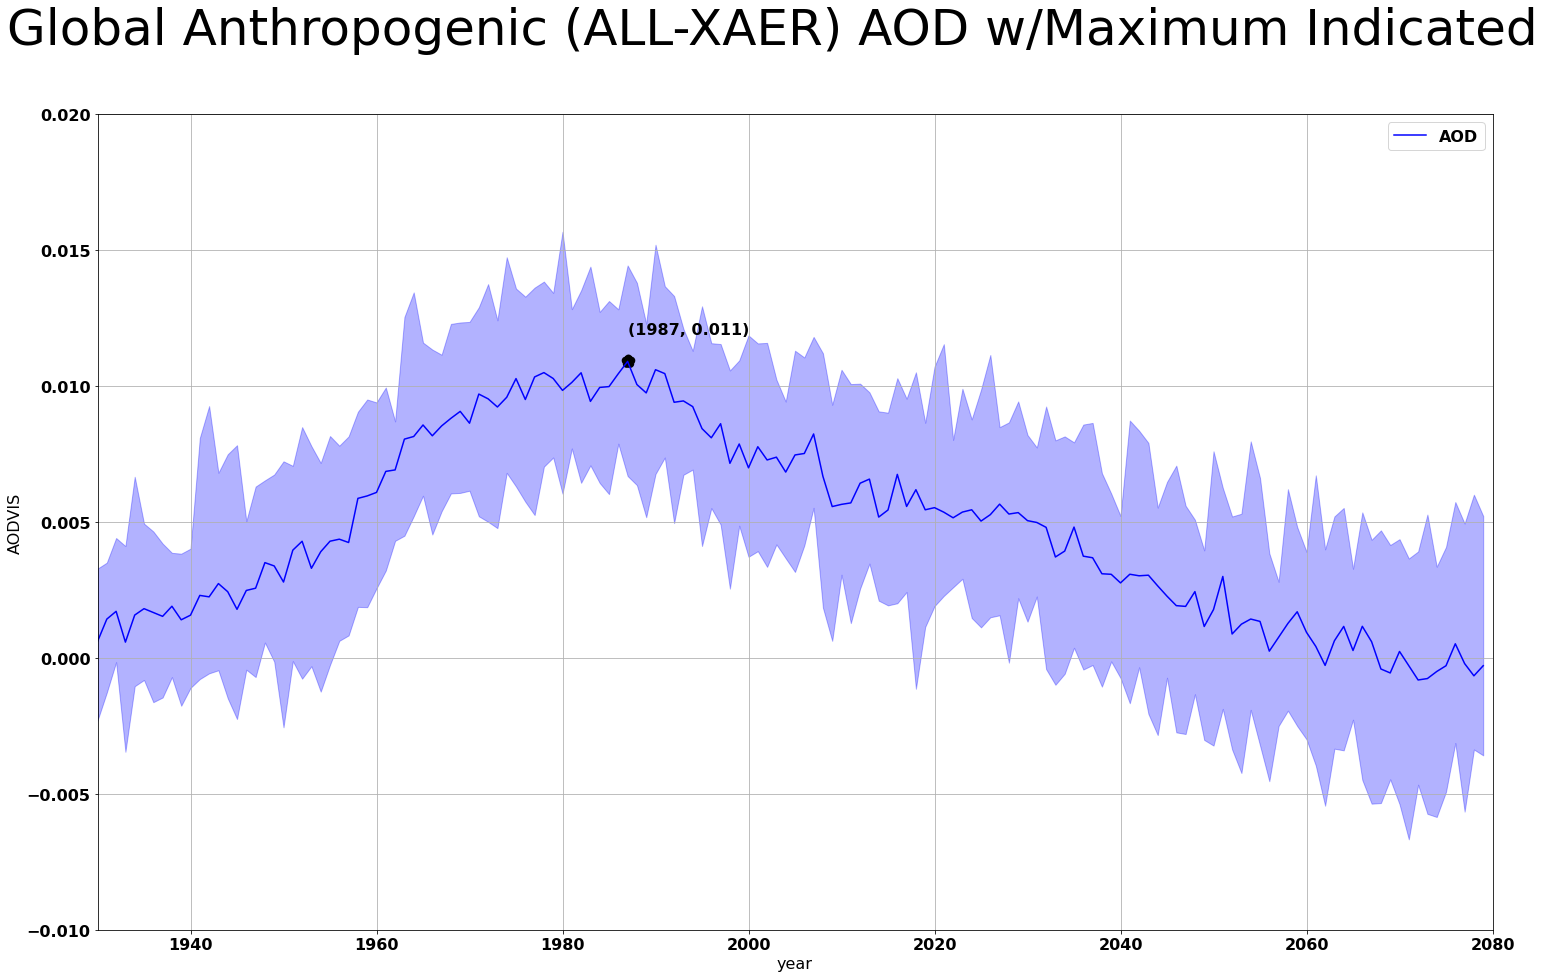

In [67]:
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
f, ax = plt.subplots(1, 1, figsize=(25, 15), facecolor='w')
f.suptitle("Global Anthropogenic (ALL-XAER) AOD w/Maximum Indicated", fontsize=50)
font = {'weight': 'bold',
        'size': 16}
rc('font', **font)
aod_color = "blue"
aer_color = "red"

aod_data.mean(dim="member").plot(ax=ax, color=aod_color, label="AOD")
ax.fill_between(aod_data.year, aod_data.min(dim="member"), aod_data.max(dim="member"), alpha=0.3, color=aod_color)
max_year = max(aod_data.mean(dim="member")).year.values
max_val = aod_data.mean(dim="member").max().values
ax.scatter(max_year, max_val, marker="*", linewidth=8, color="black")
ax.text(max_year, max_val + 0.001, f"({max_year}, {str(max_val.round(3))})")

ax.set_xlim(1930, 2080)
# ax.set_ylim(0.08, 0.11)
ax.legend()
ax.grid()

In [198]:
all_min, xghg_min, xaer_min = tmax()
land_m = xarray.open_dataset(land_mask())["__xarray_dataarray_variable__"]
all_min = xarray.open_mfdataset([path for path in all_min if exp_num in path], concat_dim="member", combine="nested")[f"{var}_tx90"].dt.days.sel(time=slice(1920,2079))
xaer_min = xarray.open_mfdataset([path for path in xaer_min if exp_num in path], concat_dim="member", combine="nested")[f"{var}_tx90"].dt.days.sel(time=slice(1920,2079))
ds_min = (all_min.mean(dim="member") - xaer_min.mean(dim="member")).where(land_m > 0)
ds_min = ds_min.assign_coords(lon=(((ds_min.lon + 180) % 360) - 180)).sortby('lon').load()

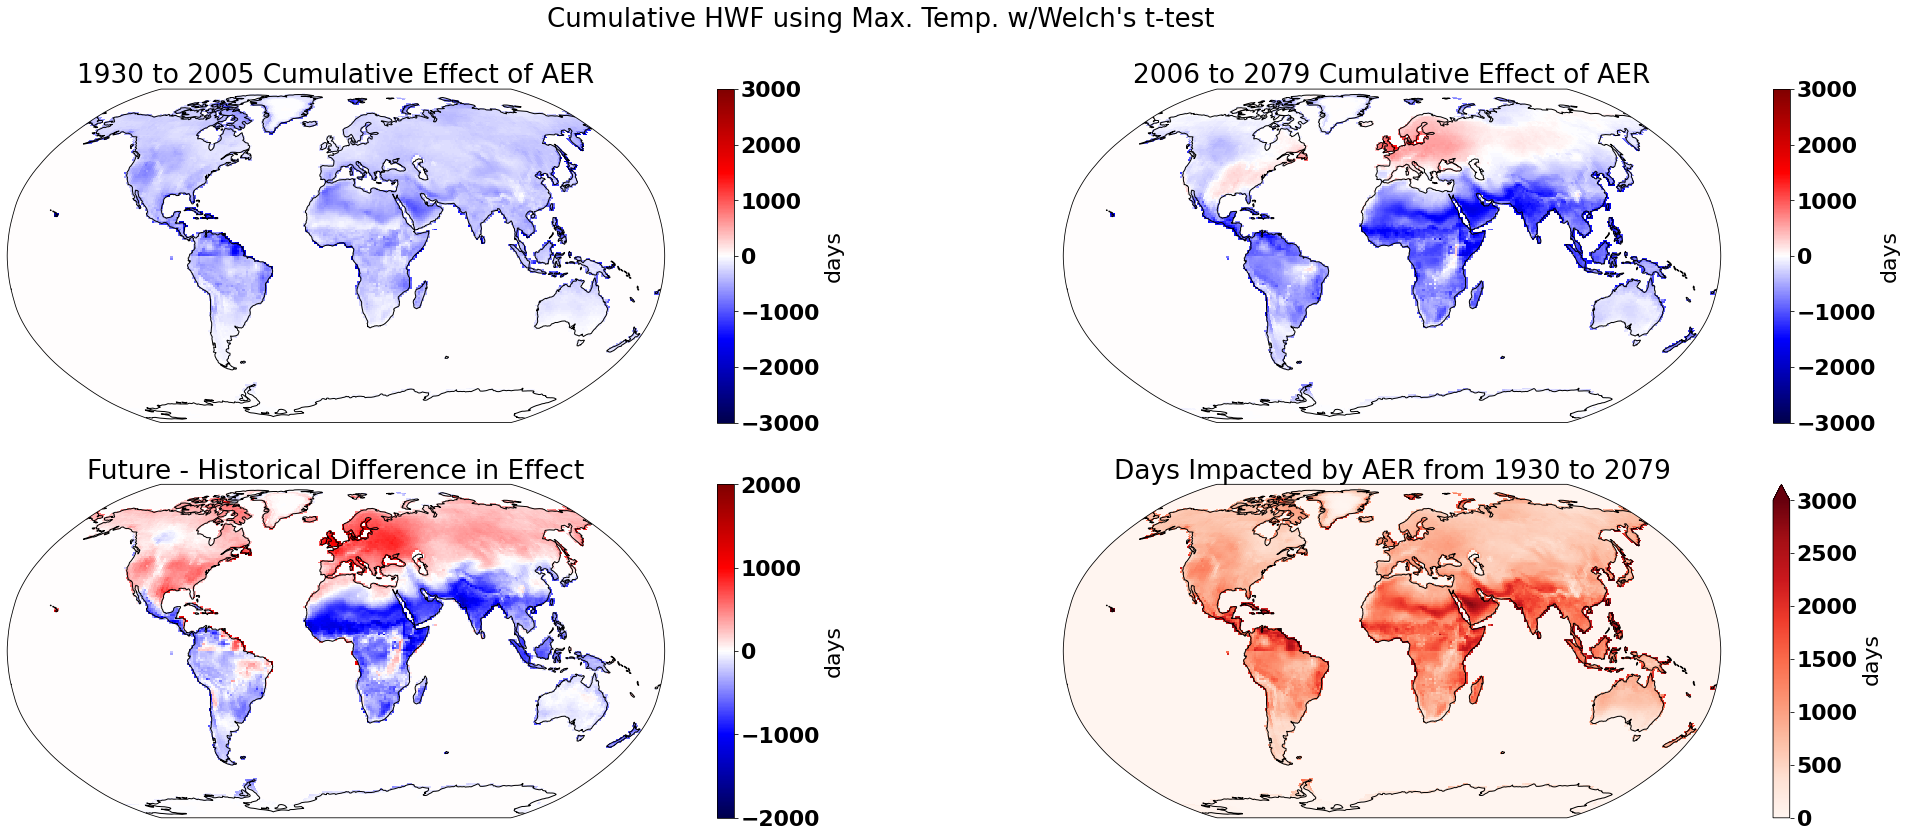

In [199]:
from paths import heat_out_trefht_tmin_members_1920_1950_CONTROL as tmin, heat_out_trefht_tmax_members_1920_1950_CONTROL as tmax, land_mask
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors
from matplotlib import rc
import matplotlib.patches as mpatches
from analysis import t_test_mask
import numpy as np
from scipy.stats import ttest_ind

exp_num = "3136"

vmin = -3000
vmax = 3000
cmap = "seismic"
var = "HWF"

rc('font', **{'family': 'normal', 'weight': 'bold', 'size': 22})
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 12), facecolor='w', subplot_kw={'projection': ccrs.Robinson()})
f.suptitle(f"Cumulative {var} using Max. Temp. w/Welch's t-test ", fontsize=26)

ds_min.sel(time=slice(1930, 2005)).sum(dim="time").plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap=cmap)
ds_min.sel(time=slice(2006, 2079)).sum(dim="time").plot(ax=ax2, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap=cmap)
(ds_min.sel(time=slice(2006, 2079)).sum(dim="time") - ds_min.sel(time=slice(1930, 2005)).sum(dim="time")).plot(ax=ax3, transform=ccrs.PlateCarree(), cmap=cmap, vmax=2000, vmin=-2000)
abs(ds_min).sum(dim="time").plot(ax=ax4, transform=ccrs.PlateCarree(), cmap="Reds", vmax=3000)

ax1.set_title("1930 to 2005 Cumulative Effect of AER")
ax2.set_title("2006 to 2079 Cumulative Effect of AER")
ax3.set_title("Future - Historical Difference in Effect")
ax4.set_title("Days Impacted by AER from 1930 to 2079")

ax1.coastlines()
ax2.coastlines()
ax3.coastlines()
ax4.coastlines()

f.tight_layout()

In [161]:
fut = ds_min.sel(time=slice(2006, 2079)).mean(dim="lat").mean(dim="lon").std()
hist = ds_min.sel(time=slice(1930, 2005)).mean(dim="lat").mean(dim="lon").std()

In [162]:
fut

<xarray.DataArray 'days' ()>
array(2.9325675)

In [163]:
hist

<xarray.DataArray 'days' ()>
array(2.40062773)

In [5]:
from paths import heat_out_trefht_tmin_members_1920_1950_CONTROL as tmin, heat_out_trefht_tmax_members_1920_1950_CONTROL as tmax, land_mask
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors
from matplotlib import rc
import matplotlib.patches as mpatches
from analysis import t_test_mask
import numpy as np
from scipy.stats import ttest_ind

exp_num = "3136"
var = "HWF"

all_min, xghg_min, xaer_min = tmin()
land_m = xarray.open_dataset(land_mask())["__xarray_dataarray_variable__"]
all_min = xarray.open_mfdataset([path for path in all_min if exp_num in path], concat_dim="member", combine="nested")[f"{var}_tn90"].dt.days.sel(time=slice(1920,2079))
xaer_min = xarray.open_mfdataset([path for path in xaer_min if exp_num in path], concat_dim="member", combine="nested")[f"{var}_tn90"].dt.days.sel(time=slice(1920,2079))
ds_min = (all_min.mean(dim="member") - xaer_min.mean(dim="member")).where(land_m > 0)
ds_min = ds_min.assign_coords(lon=(((ds_min.lon + 180) % 360) - 180)).sortby('lon').load()

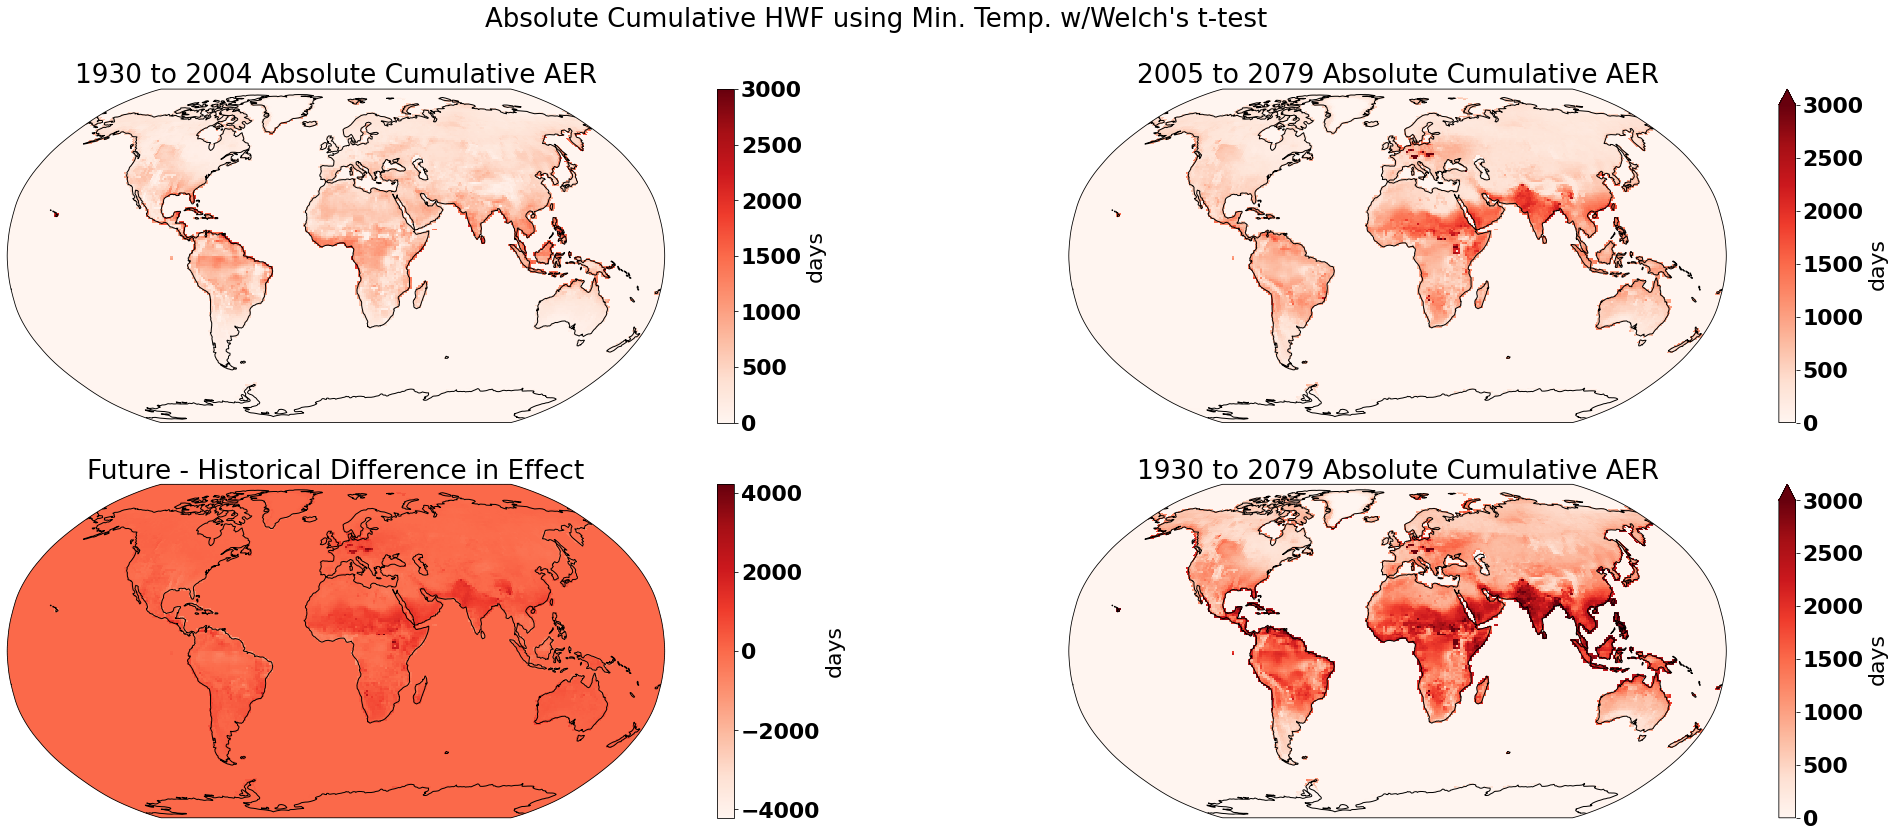

In [20]:
vmin = 0
vmax = 3000
cmap = "Reds"

rc('font', **{'family': 'normal', 'weight': 'bold', 'size': 22})
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 12), facecolor='w', subplot_kw={'projection': ccrs.Robinson()})
f.suptitle(f"Absolute Cumulative {var} using Min. Temp. w/Welch's t-test ", fontsize=26)

abs(ds_min).sel(time=slice(1930, 2004)).sum(dim="time").plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap=cmap)
abs(ds_min).sel(time=slice(2005, 2079)).sum(dim="time").plot(ax=ax2, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap=cmap)
(abs(ds_min).sel(time=slice(2005, 2079)).sum(dim="time") - abs(ds_min).sel(time=slice(1930, 2004)).sum(dim="time")).plot(ax=ax3, transform=ccrs.PlateCarree(), cmap=cmap)
abs(ds_min).sum(dim="time").plot(ax=ax4, transform=ccrs.PlateCarree(), cmap="Reds", vmax=3000)

ax1.set_title("1930 to 2004 Absolute Cumulative AER")
ax2.set_title("2005 to 2079 Absolute Cumulative AER")
ax3.set_title("Future - Historical Difference in Effect")
ax4.set_title("1930 to 2079 Absolute Cumulative AER")

ax1.coastlines()
ax2.coastlines()
ax3.coastlines()
ax4.coastlines()

f.tight_layout()

In [17]:
2005-2079

-74